/tmp/ipykernel_30038/3943015013.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_2017 = data["2017"].reset_index().set_index("Day")
/tmp/ipykernel_30038/3943015013.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_2019 = data["2019"].reset_index().set_index("Day")


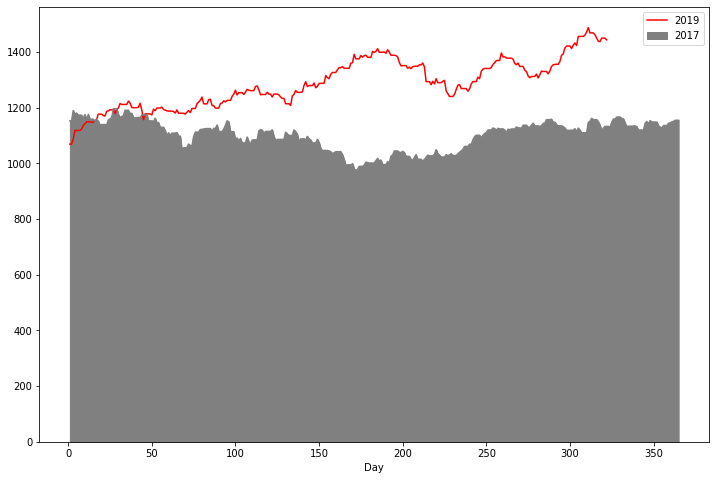

DatetimeIndex(['2019-02-19'], dtype='datetime64[ns]', name='Date', freq=None)


In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://video.ittensive.com/python-advanced/rts-index.csv")
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
dates = pd.date_range(min(data["Date"]), max(data["Date"]))
data = data.set_index("Date")
data = data.reindex(dates).ffill()
data["Day"] = pd.to_datetime(data.index).dayofyear
data.index.name = "Date"
data = data.sort_index()

data_2017 = data["2017"].reset_index().set_index("Day")
data_2019 = data["2019"].reset_index().set_index("Day")
# data_2017 = data["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean()

fig = plt.figure(figsize=(12,8))
area = fig.add_subplot(1, 1, 1)
data_2019["Close"].plot(ax=area, color="red", label="2019")
data_2017["Close"].plot.area(ax=area, color=".5", label="2017")
# data_2017.plot(ax=area, color="orange", label="Exp.2017", lw=3)
# data["2017"].reset_index().set_index("Day")["Close"].plot.area(ax=area, color=".5", label="2017")
# data["2018"].reset_index().set_index("Day")["Close"].plot(ax=area, color="blue", label="2018", lw=3)
plt.legend()
plt.show()

data_fall = data_2019[data_2019["Close"] < data_2017[0:len(data_2019)]['Max']]
data_fall.set_index("Date", inplace=True)
data_fall = data_fall.sort_index(ascending=False)
print (data_fall.head(1).index)